In [ ]:
"""
The ML Procedure can be done based on following steps

1 - Preprocessing + EDA + Feature Selection
2 - Extract Input and Output Columns
3 - Scale the values (if need using "import sklearn.processing import StandardScaler")
4 - Train Test Split 
5 - Train the Model
6 - Evaluate the model (check accuracy, Draw Confusion Mertics etc)
7 - Save the Model
8 - Deploy the Model

"""

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 1 - Preprocessing + EDA + Feature Selection

### Preprocessing

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


At this stage, there's no,
 * Missing Values to handle (N/A Values)
 * No issue of naming of columns
 * No need to change name or symbols or data types of columns

### EDA

In [34]:
# The Employees who left the Organization

left = df[df['left'] == 1]
left.head()
left.shape

(3571, 10)

In [32]:
# The Employees who retain the Organization
retain = df[df['left'] == 0]
retain.shape

(11428, 10)

In [44]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [38]:
# Taking Average of all columns basis on left or not

df.groupby('left').mean()

C:\Users\cw\AppData\Local\Temp\ipykernel_9708\3988611043.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


The Above table concludes

- satisfaction_level = Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
- average_montly_hours = Average monthly hours are higher in employees leaving the firm (199 vs 207)
- promotion_last_5years = Employees who are given promotion are likely to be retained at firm (it's a very minor value, that's why we ignore it)
- Work_accident = Employees who Face more accidents stay in organization as per data rather than the employees who face less accidents 

MoreOver,
There's not much effect of last_evaluation, number_project and time_spend_company. So, we ignore them all

<Axes: xlabel='salary'>

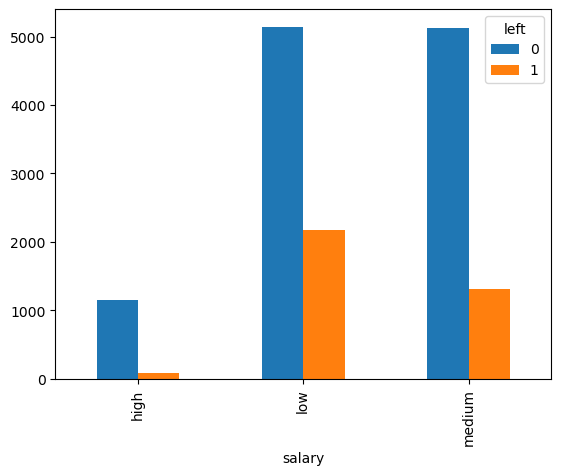

In [55]:
# Now Take a look on non-numeric data (Department and Salary)

pd.crosstab(df['salary'], df['left']).plot(kind = 'bar')

<Axes: xlabel='Department'>

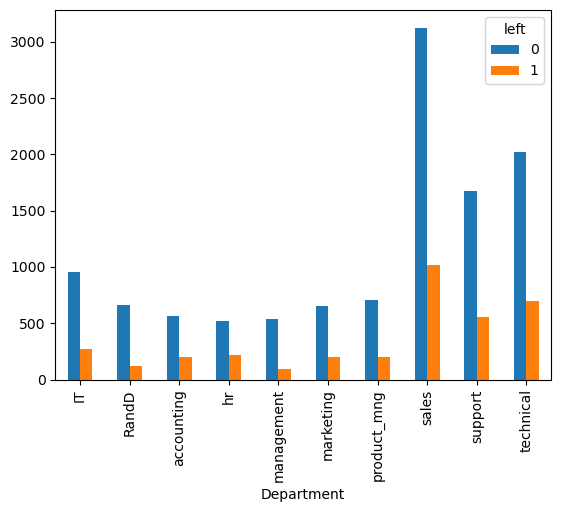

In [59]:
pd.crosstab(df['Department'], df['left']).plot(kind = 'bar')

As per these barcharts, the salary impacts but department not impact as much
- The individuals with high salary have less left rate.
- The individuals with low salary have much left rate and vice versa.

### Feature Selection

In [79]:
sub_df = df[['satisfaction_level', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'salary', 'left']]
sub_df

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,left
0,0.38,157,0,0,low,1
1,0.80,262,0,0,medium,1
2,0.11,272,0,0,medium,1
3,0.72,223,0,0,low,1
4,0.37,159,0,0,low,1
...,...,...,...,...,...,...
14994,0.40,151,0,0,low,1
14995,0.37,160,0,0,low,1
14996,0.37,143,0,0,low,1
14997,0.11,280,0,0,low,1


#### One Hot Encoding (For convert salary column into numeric values)

In [84]:
dummies = pd.get_dummies(df.salary)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [88]:
merged = pd.concat([sub_df, dummies], axis = 1)
merged

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,left,high,low,medium
0,0.38,157,0,0,low,1,0,1,0
1,0.80,262,0,0,medium,1,0,0,1
2,0.11,272,0,0,medium,1,0,0,1
3,0.72,223,0,0,low,1,0,1,0
4,0.37,159,0,0,low,1,0,1,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,0,low,1,0,1,0
14995,0.37,160,0,0,low,1,0,1,0
14996,0.37,143,0,0,low,1,0,1,0
14997,0.11,280,0,0,low,1,0,1,0


In [92]:
final_df = merged.drop(['low', 'salary'], axis = 1)
final_df

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,left,high,medium
0,0.38,157,0,0,1,0,0
1,0.80,262,0,0,1,0,1
2,0.11,272,0,0,1,0,1
3,0.72,223,0,0,1,0,0
4,0.37,159,0,0,1,0,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0,0
14995,0.37,160,0,0,1,0,0
14996,0.37,143,0,0,1,0,0
14997,0.11,280,0,0,1,0,0


## Extract Input and Output Columns

In [110]:
X = final_df.drop(['left'], axis = 1)

Y = final_df['left']


## Scale the values 

At this time we didn't need to scale the values or put values in a specific range using transform_fit

## Train Test Split

In [120]:
from sklearn.model_selection import train_test_split

In [128]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size = 0.2)

len(X_test)
len(Y_test)

11999

## Train the Model

In [131]:
from sklearn.linear_model import LogisticRegression

In [157]:
model = LogisticRegression(max_iter = 1000)

model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Evaluate the model

In [159]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [161]:
model.score(X_test, Y_test)

0.7783981998499875

### Confusion Metrix

In [164]:
Y_pred = model.predict(X_test)

In [166]:
from sklearn.metrics import confusion_matrix

In [170]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[8625,  543],
       [2116,  715]], dtype=int64)

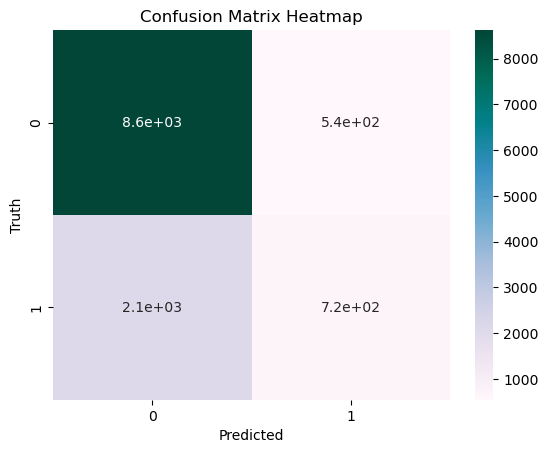

In [202]:
sns.heatmap(cm, annot = True, cmap = 'PuBuGn')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix Heatmap")
plt.show()

## Save the Model

In [205]:
import pickle

In [ ]:
with open("LR")